# Titanic:machine learning disaster

This notebook is meant to take you through the different phases of undertaking a exploratory data analysis while carying out an end-to-end data science project (from analysis down to model deployemnt).

## Data Analysis

In [1]:
# Importing necessary libraries for this task

# for handling the dataset
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt

# for displaying entire columns contained in a dataframe
pd.set_option('display.max_columns', None)

In [2]:
# loading the dataset
data = pd.read_csv('./titanic/train.csv')

# data orientation
print(data.shape)

# taking a glance
data.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The titanic disaster dataset contains 891 rows, i.e., pasengers, and 12 columns, i.e., variables. 

**Analysis will be carried out to identify:**
- Missing values
- Numerical features and their distribution
- Categorical features and their cardinality
- Outlier Detection and removal
- Identify relationship between independent features and dependent feature: Survived

### Missing values identification

Let's proceed to identify variables with missing values in the dataset

In [3]:
# make a list of variabes with missing values
vars_with_na = []
for var in data.columns:
    if data[var].isnull().sum() > 0:
        vars_with_na.append(var)
        
# checking percentage of missing values
data[vars_with_na].isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

Our dataset contains a few variables with missing values. We will take care of this in the feature preprocessing/engineering notebook.

It's also a good idea to check the **relationship between the missing values and the target variable 'Survived'.**

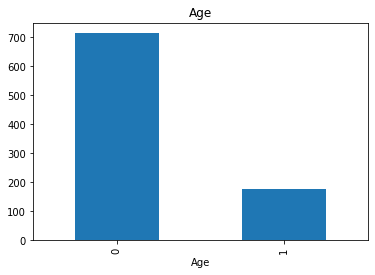

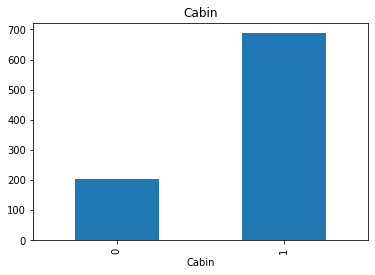

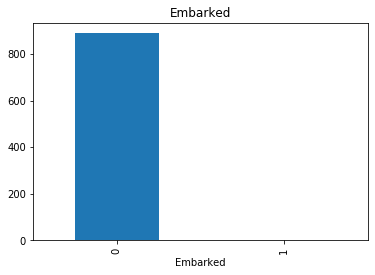

In [4]:
def explore_na_val_and_target(df, var):
    df = df.copy()
#     fill ones where observation is missing else zero
    df[var] = np.where(df[var].isnull(), 1, 0)
#     compare the average number of survival where value is missing
#     vs where value is available
    df.groupby(var)['Survived'].count().plot.bar()
    
    plt.title(var)
    plt.show()

# loop through the variables with missing values and execute the explore function
for var in vars_with_na:
    explore_na_val_and_target(data, var)

The average number of survival where value is missing differ from where value exist, hence it may be beneficial to handle them by not removing entirely.

### Numerical varibales identification

Let's proceed to identify the numerical vaiables we have in our dataset

In [5]:
# make a list of numerical vaiables
num_vars = []
for var in data.columns:
    if data[var].dtypes != 'O':
        num_vars.append(var)
        
print('Number of numerical varibales: ', len(num_vars))        
data[num_vars].head(3)

Number of numerical varibales:  7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250


It is clear from above that the variable PassengerId is only an identifier for the passengers aboard the titanic ship, hence we will not include this in our predictors. Below is a proof:

In [6]:
print('Number of Passenger Id: ', len(data['PassengerId'].unique()))
print('Number of Passengers in the dataset: ', len(data))

Number of Passenger Id:  891
Number of Passengers in the dataset:  891


Numerical variables can furthermore be discrete or continuous, hence it is important to also explore numerical variales at that level.

**Discrete variables identification**

In [7]:
# make a list of discrete variables
discrete_vars = []

for var in num_vars:
    if data[var].nunique() < 20 and var != 'PassengerId':
        discrete_vars.append(var)

print('Number of discrete variables: ', len(discrete_vars))
data[discrete_vars].head(3)

Number of discrete variables:  4


,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0


The identified varibales seems to be Passenger Class Identifier, and Family identifier. We will proceed to idemtify their contribution to the survival rate.

In [8]:
# tt = data[['SibSp', 'Survived']].groupby('SibSp').mean().reset_index()
# tt

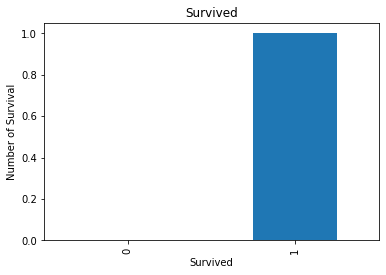

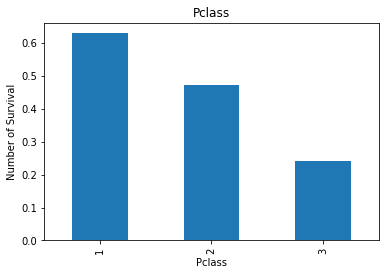

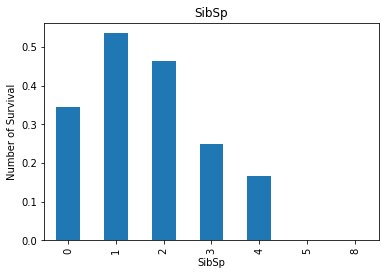

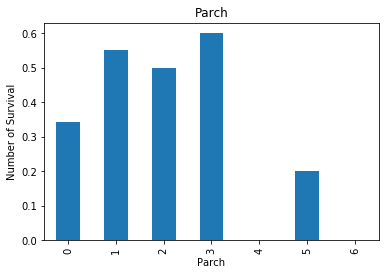

In [9]:
def explore_discrete_vars(df, var):
    df = df.copy()
    df.groupby(var)['Survived'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('Number of Survival')
    plt.show()
    
for var in discrete_vars:
    explore_discrete_vars(data, var)

A monotonic relationship exist between the number of survival and the discrete variables, though this isn't always the case as seen in passenger class 'PClass' and number of survival.

**Continuous varibale identification**

This are variables that are infinite in nature. Let's proceed to identify them.

In [10]:
# make a list of continuous variables
continuous_vars = []

for var in num_vars:
    if data[var].nunique() >= 20 and var != 'PassengerId':
        continuous_vars.append(var)

print('Number of continuous variables: ', len(continuous_vars))
data[continuous_vars].head(3)

Number of continuous variables:  2


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250


let's proceed to exploring there distribution

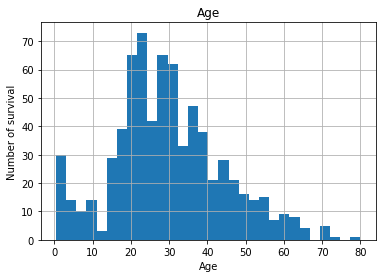

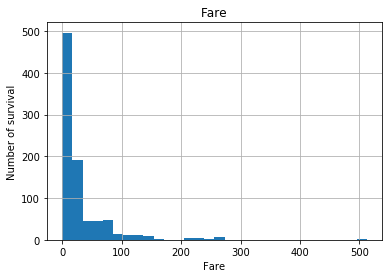

In [11]:
def explore_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.title(var)
    plt.ylabel('Number of survival')
    plt.xlabel(var)
    plt.show()
    
for var in continuous_vars:
    explore_continuous(data, var)

The variables are not normally distributed. We will perform some transformation on them in the feature engineering notebook as it is important to the performance of our model.

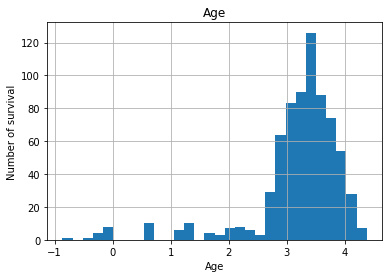

In [12]:
def explore_transformed_continuous(df, var):
    df = df.copy()
    
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of survival')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in continuous_vars:
    explore_transformed_continuous(data, var)

In [13]:
# # let's explore the relationship between the house price and
# # the transformed variables with more detail:


# def transform_analyse_continuous(df, var):
#     df = df.copy()

#     # log does not take negative values, so let's be careful and skip those variables
#     if any(data[var] <= 0):
#         pass
#     else:
#         # log transform the variable
#         df[var] = np.log(df[var])
        
#         # log transform the target (remember it was also skewed)
#         df['Survived'] = np.log(df['Survived'])
        
#         # plot
#         plt.scatter(df[var], df['Survived'])
#         plt.ylabel('Survived')
#         plt.xlabel(var)
#         plt.show()


# for var in continuous_vars:
#     if var != 'Survived':
#         transform_analyse_continuous(data, var)

### Outlier detection

It is important to know that the presence of extreme values may affect the performace of a linear model. Hence, it is to identify and do something about them.

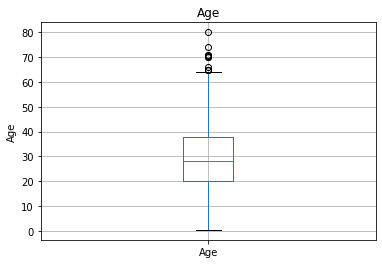

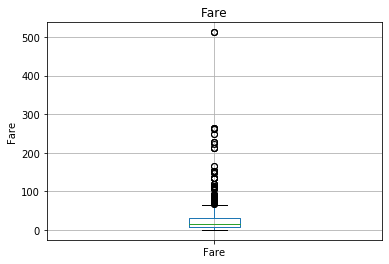

In [14]:
# using boxplot to visualize outliers in the continuous variables

def detect_outliers(df, var):
    df = df.copy()
    
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in continuous_vars:
    detect_outliers(data, var)
        

Majority of the contunuos varibales seems to contain outliers.We will do something about them during feature engineering.

### Categorical variable identification

Let's proceed to identify and explore the categorical varibales in our dataset.

In [15]:
# make a list of categorical variables
cat_vars = []
for var in data.columns:
    if data[var].dtypes == 'O':
        cat_vars.append(var)
        
print('Number of categorical variables: ', len(cat_vars))
data[cat_vars].head(3)

Number of categorical variables:  5


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


It's important to know the number of cardinality for your categorical varibales as this help to guide you on appropriate method of encoding. So let's proceed to do that.

In [16]:
data[cat_vars].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [17]:
# data[~data['Cabin'].isnull()]['Cabin']

In [18]:
# data[~data['Ticket'].isnull()]['Ticket'].tolist()

In [19]:
# tt = list(data[~data['Ticket'].isnull()]['Ticket'])

# ls = []
# for var in tt:
#     ls.append(var.split())
# ls 

Most of the categorical varibales show a high cardinality, this means they have many different labels. Whereever possible, we need to do something about this. 

It's also important to identify labels that are present in a small number in our categorical variables as this can lead to issues when testing. Labels like this are called **rare labels**.

In [20]:
def identify_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    tmp = df.groupby(var)['Survived'].count() / len(df)
    
    return tmp[tmp < rare_perc]

for var in cat_vars:
    print(identify_rare_labels(data, var, 0.01))

Name
Abbing, Mr. Anthony                      0.001122
Abbott, Mr. Rossmore Edward              0.001122
Abbott, Mrs. Stanton (Rosa Hunt)         0.001122
Abelson, Mr. Samuel                      0.001122
Abelson, Mrs. Samuel (Hannah Wizosky)    0.001122
                                           ...   
de Mulder, Mr. Theodore                  0.001122
de Pelsmaeker, Mr. Alfons                0.001122
del Carlo, Mr. Sebastiano                0.001122
van Billiard, Mr. Austin Blyler          0.001122
van Melkebeke, Mr. Philemon              0.001122
Name: Survived, Length: 891, dtype: float64
Series([], Name: Survived, dtype: float64)
Ticket
110152         0.003367
110413         0.003367
110465         0.002245
110564         0.001122
110813         0.001122
                 ...   
W./C. 6608     0.004489
W./C. 6609     0.001122
W.E.P. 5734    0.001122
W/C 14208      0.001122
WE/P 5735      0.002245
Name: Survived, Length: 681, dtype: float64
Cabin
A10    0.001122
A14    0.001122
A16  

Majority of the categorical variables show multiple labels that are present in less than 1%. This tends to cause over-fiting of machine learning models.

In [21]:
# for var in cat_vars:
#     # we can re-use the function to determine median
#     # sale price, that we created for discrete variables

#     explore_discrete_vars(data, var)

**Disclaimer:** this is by no means an exhaustive data exploration.